In [48]:
import matplotlib.pyplot as plt
import numpy as np 

In [49]:
m = 0.7 
c = 0.3

X = np.arange(0, 1, 0.02)
y = m * X + c

print("Shape of X = ", X.shape)
print("Shape of y = ", y.shape)

Shape of X =  (50,)
Shape of y =  (50,)


In [50]:
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40,) (40,)
(10,) (10,)


In [51]:
def plot_data(X_train = X_train, y_trai = y_train, X_test = X_test, y_test = y_test, predictions = None):

    plt.figure(figsize=(8,6))
    plt.scatter(X_train, y_train, c = 'b', s=10, label='Training Data')
    plt.scatter(X_test, y_test, c = 'r', s=10, label='Testing Data')

    if predictions is not None:
        plt.scatter(X_test, predictions, c = 'g', s=10, label='Predicted Data')
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Scatter Plot of X and Y")

    
    

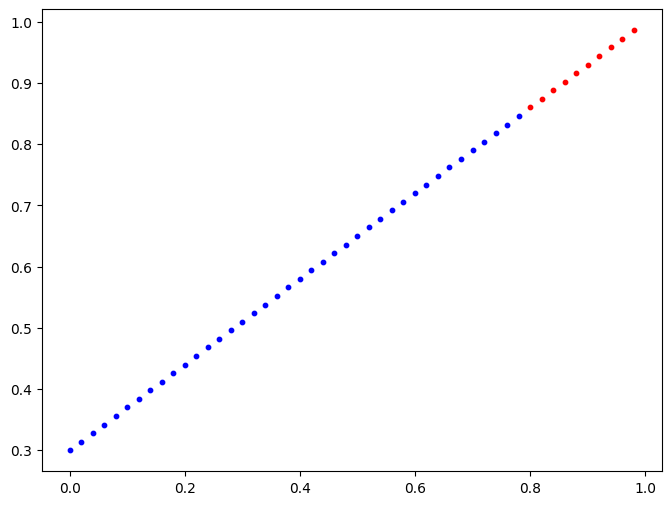

In [52]:
plot_data()

In [53]:
W = np.random.randn(1)
b = np.random.randn(1)
print(W, b)

[-0.11777493] [-0.74813331]


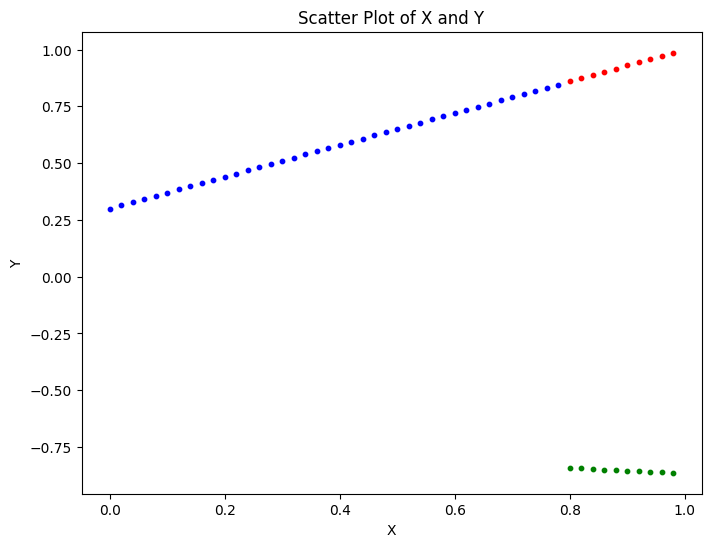

In [54]:
y_out = X_test * W + b
plot_data(predictions=y_out)

In [55]:
def loss_fn(y_true, y_pred):
    return np.sum(np.square(y_true - y_pred))/len(y_true)

In [56]:
# build the training loop
epochs = 100
alpha = 0.1
trainLossList = []
testLossList = []
for epoch in range(epochs):
    # Forward paass
    y_pred = X_train * W + b

    # Compute train loss
    train_loss = loss_fn(y_true=y_train, y_pred=y_pred)
    trainLossList.append(train_loss)

    # Compute the graident 
    gradientW = (-2 * np.sum((y_train - y_pred) * X_train))/len(y_train)
    gradientb = (-2 * np.sum(y_train - y_pred))/len(y_train)

    # Backpropagate
    W = W - alpha * gradientW
    b = b - alpha * gradientb

    # Compute Test Loss
    test_pred = X_test* W +b
    test_loss = loss_fn(y_true=y_test, y_pred=test_pred)
    testLossList.append(test_loss)
    if(epoch%10 == 0):
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Train Loss: 1.90451 | Test Loss: 1.96129
Epoch: 10 | Train Loss: 0.01467 | Test Loss: 0.05498
Epoch: 20 | Train Loss: 0.00418 | Test Loss: 0.01945
Epoch: 30 | Train Loss: 0.00343 | Test Loss: 0.01485
Epoch: 40 | Train Loss: 0.00285 | Test Loss: 0.01226
Epoch: 50 | Train Loss: 0.00237 | Test Loss: 0.01019
Epoch: 60 | Train Loss: 0.00197 | Test Loss: 0.00847
Epoch: 70 | Train Loss: 0.00164 | Test Loss: 0.00704
Epoch: 80 | Train Loss: 0.00136 | Test Loss: 0.00585
Epoch: 90 | Train Loss: 0.00113 | Test Loss: 0.00487


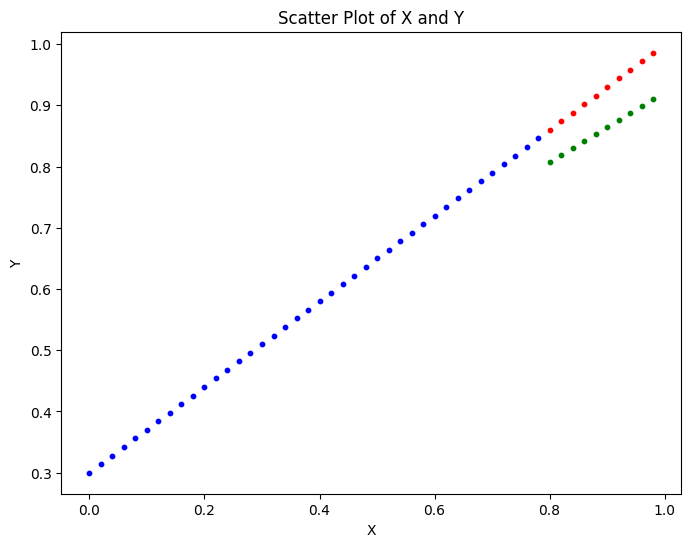

In [57]:
y_out = X_test * W + b
plot_data(predictions=y_out)

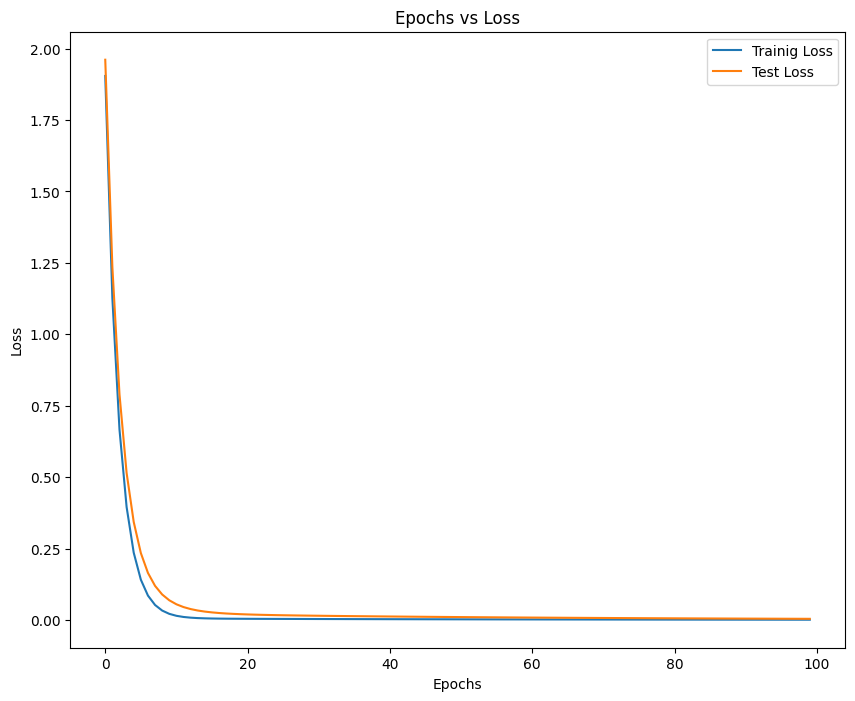

In [58]:
# Plot Loss Curve
plt.figure(figsize=(10,8))
plt.plot(range(epochs), trainLossList, label="Trainig Loss")
plt.plot(range(epochs), testLossList, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend()